In [7]:
import math
from scipy.stats import binom, norm

alpha = 0.05
n = 10
theta_0 = 0.3

def find_critical_value(n, theta_0, alpha):
  for C in range(n + 1):
    prob = sum(binom.pmf(k, n, theta_0) for k in range(C+1, n+1))
    if prob < alpha:
      r = (alpha - prob) / binom.pmf(C, n, theta_0)
      return C, r
  return None, None

C, r = find_critical_value(n, theta_0, alpha)
print(f"C = {C}, r = {r}")


C = 5, r = 0.025758156494762343


In [12]:
import math
from scipy.stats import binom, norm
import math

# 给定的值
theta = 0.25
theta_0 = 0.125
alpha = 0.1
pi_theta = 0.95

# z 值
z_pi = norm.ppf(0.05)  # z_{0.95}
z_alpha = norm.ppf(0.9)  # z_{0.1}

print(z_pi)
print(z_alpha)
# 计算 theta(1 - theta)
theta_term = theta * (1 - theta)

# 计算 (theta_0 - theta)^2
theta_diff_squared = (theta_0 - theta) ** 2

# 计算分数
fraction = theta_term / theta_diff_squared

# 计算平方根部分
sqrt_ratio = math.sqrt((theta_0 * (1 - theta_0)) / theta_term)

# 计算 z 值的差
z_diff = z_pi - z_alpha * sqrt_ratio

# 平方差值
z_diff_squared = z_diff ** 2

# 计算 n
n =fraction * z_diff_squared

print("计算得到的 n 是：", n)

-1.6448536269514729
1.2815515655446004
计算得到的 n 是： 82.602774301625


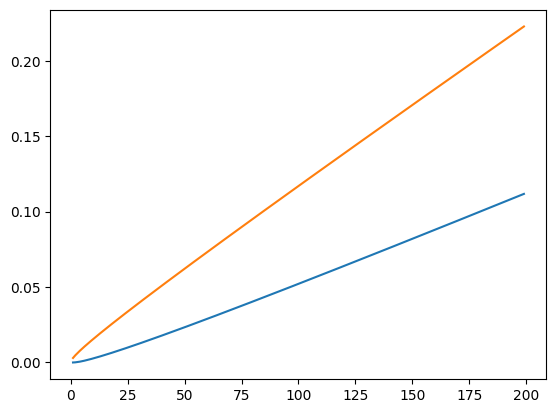

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# 定义 n 的范围
n_values = np.arange(1, 200, 1)

# 定义速率参数
theta1 = 1/1500
theta2 = 1/1000

# 计算分位数
quantile_01 = gamma.ppf(0.01, a=n_values, scale=theta1)
quantile_95 = gamma.ppf(0.95, a=n_values, scale=theta2)

# 计算n值使得(gamma(n, theta_1))^(-1)(0.95) = (gamma(n, theta_2))^(-1)(0.01)
for i in range(199):
  if quantile_95[i] < quantile_01[i]:
    n = i
    break
# 画出两条曲线在一张图中
plt.plot(n_values, quantile_01, label='gamma(n, theta_1)')
plt.plot(n_values, quantile_95, label='gamma(n, theta_2)')







In [4]:
import pandas as pd

data = [[110, 128, 48, 123, 19],
        [214, 183, 115, 114, 129],
        [208, 183, 130, 225, 114]]

df = pd.DataFrame(data, index=['1', '2', '3'], columns=['1', '2', '3', '4', '5'])
df.index.name = 'A'
df.columns.name = 'B'

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# 输入数据
data = [
    [110, 128, 48, 123, 19],
    [214, 183, 115, 114, 129],
    [208, 183, 130, 225, 114]
]

# 创建数据框
df = pd.DataFrame(data, columns=['A', 'B', 'C', 'D', 'E'])

# 逐行平均值
row_means = df.mean(axis=1)

# 逐列平均值
col_means = df.mean(axis=0)

# 所有数据的平均值
overall_mean = df.values.mean()

print("逐行平均值:")
print(row_means)

print("\n逐列平均值:")
print(col_means)

print("\n全部数据的平均值:")
print(overall_mean)

# 双因素方差分析
# 假设数据框中的列为不同因素，而行代表不同的样本

# 进行双因素方差分析（方差分析：A和B两个因素）
# 用 `stats.f_oneway` 可以做一元方差分析，但双因素方差分析需要使用 `statsmodels` 或 `pingouin` 库

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 把数据转为长格式
df_long = pd.melt(df, var_name='Factor', value_name='Value')
df_long['Subject'] = np.tile(range(df.shape[0]), df.shape[1])

# 创建模型
model = ols('Value ~ C(Factor) + C(Subject) + C(Factor):C(Subject)', data=df_long).fit()

# 进行方差分析
anova_results = anova_lm(model)
print("\n双因素方差分析结果:")
print(anova_results)

# F-test (针对整体方差的检验)
# 计算每列的F值进行F-test（此为简化版F检验）
f_test_results = {}

for col in df.columns:
    # 假设零假设：各列均值相等
    group_data = df[col]
    f_val, p_val = stats.f_oneway(group_data, group_data)  # 用相同的数据进行F检验（此为简化形式）
    f_test_results[col] = (f_val, p_val)

print("\nF-test 结果:")
for col, result in f_test_results.items():
    print(f"{col}: F-value = {result[0]}, p-value = {result[1]}")
